# What is Micrograd?

"**Micrograd**" is small autograd engine. The word **Autograd** is short for "**Automatic Gradient**". Autograd is also the name of PyTorch's automatic differentiation system.

What "Micrograd" does, is that it implements the "Backpropagation" algorithm. "Backprop" helps us **efficiently compute the gradient of a loss/error function with respect to the weights of a given neural network**.

With the gradient, we can iterativelly tune/tweak the weights of a network to minimize our loss function.

I am building Micrograd following **Andrej Karpathy** [YouTube](https://youtu.be/VMj-3S1tku0) video.

# Why Am I learning this? 💡🧠

1. I want **Deep understanding**. As a newcomer, I do not want to fall into the rush of building the "cool" stuff. I would like to practice patience, taking the time to **learn what led to the cool stuff**... I want to believe that it will pay ten fold in the future.

2. According to Andrej, **Backpropagation is at the CORE of any modern deep learning frameworks**, like PyTorch, JAX, TensorFlow, etc... I believe him.

3. My supervisor told me that PyTorch's Autograd is useful when debugging a neural network, and debugging is an important part of neural network development. So, taking some time to understand what happens under the hood might pay in the future? We'll see. I can only connect the dots looking backward. 😉

# What can Micrograd do?



At [1:30](https://youtu.be/VMj-3S1tku0?t=90) of this video, Andrej starts outlining the following capabilities:

1. Micrograd (and also Autograd) helps us **build expression graphs** which are mathematical expressions represented as graphs. As we compose mathematical expressions, Micrograd will *dynamically* build an expression graph in the background.

2. We can **compute the forward passes**, meaning Micrograd will return output(s) if we give it some input(s).

3. The big deal, Andrej said, is that we can use the output of an expression graph and call a function called `backward` that will **initialize backpropagation** at that node, and will recursively apply the chain rule backward through the graph.

Since Neural networks are mathematical expressions, we can use tools like Micrograd to describe them!

# Let's Implement Micrograd 🛠️

We started with a refresh of what a derivative is, at the intuitive level, and what information it gives us.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let consider the following function: $f(x) = 3x^{2} - 4x + 5$.

In Python, $f$ would be written like this:

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
#We can call the function with 3.0
f(3.0)

20.0

We can also **plot** the function to get a sense of its shape. But by the look of it, we can see that it is going to be a parabola.

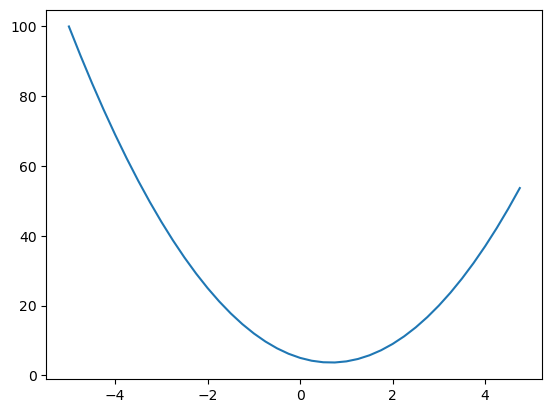

In [4]:
#1- Let's generate a set of numbers in [-5, 5)
xs = np.arange(-5, 5, 0.25)
#2- Apply f on the x values within the np array
ys = f(xs)
#3- Plot using Matplotlib
plt.plot(xs, ys)

What does taking the derivative of this function $f$ at any point $x$ tell us? It helps us answer the following questions:

- If we add a small quantity $h$ to a given $x$, how is $f$ going to respond? Is it going to increase/decrease 🤷‍♂️

- How fast will $f$ increase/decrease? In other words, what is the "rate" or the "speed" at which $f$ increase/decrease when $x$ changes 🤷‍♂️

When taking the derivative we apply the following: $\lim_{h\to 0} \frac{f(x + h) - f(x)}{h}$ and this formula is the answer to both of our questions

In [5]:
h = 0.001 #relatively small "h"
x = 3.0
(f(x + h) - f(x)) / h

14.00300000000243

In [6]:
h = 0.000000001 #an even smaller "h"
x = 3.0
(f(x + h) - f(x)) / h

14.000001158365194

This is a numerical approximation of the rate of change (slope) of $f$ when $x = 3$.  It tells us that at when $x = 3$, the function $f$ is "increasing" at a rate of $14$.

If $h$ could get infinitely small, our expression would converge to the exact value of the slope, which is $14$.

Let's now consider a function with multiple (3) inputs.

In [7]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c

The above function can also be represented using the following expression graph:

![Expression graph](./images/math-exp-graph-2.jpg)

It has $3$ inputs ($a$, $b$, and $c$), and $1$ output ($d$).

In [8]:
print(d)

4.0


Again, if we take the derivative of this expression with respect to one of its input variable, what would that tell us? 🤔

It would tell us **how the output $d$ would respond** (increase/decrease) and **how fast**... if one of the inputs were to **change**.

Let's illustrate this by considering input $a$. What happens if we take the derivative of the expression with respect to $a$. In other words, if $a$ were to change a little bit, how would $d$ change, and by how much

In [9]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h # 'a' changes a little bit
d2 = a*b + c

print('d1:', d1)
print('d2:', d2)
print('slope (or rate of change)', (d2 - d1) / h)

d1: 4.0
d2: 3.999699999999999
slope (or rate of change) -3.000000000010772


See? When I increase $a$ a tiny bit, $(ab)$ becomes more negative; and when added to $c$ it results in a smaller value.

So by increase $a$, I decrease the output $d$. That's why $d_{2}$ is *smaller* than $d_{1}$, and the rate of this change (this decrease) was: $-3$.

The result we got was a numerical approximation. But we can get to an exact answer using a little bit of calculus:

$\frac{\partial}{\partial a}(ab + c) = b$ and in our case $b$ is $-3$